# **DMML Assignment 1**
## Task 1: Customer Churn
submission by: Utpalraj Kemprai (MDS202352)

In [2]:
# importing libraries for use
# python version 3.8.5
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report

### Storing data in a dataframe

In [3]:
data = pd.read_csv("customer-churn-data.csv")
data.head() #checking first few values

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [4]:
data.shape

(1000, 15)

### Checking data types of each column

In [5]:
data.dtypes # checking data types

CustomerID                int64
Age                       int64
Gender                   object
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                 bool
PromotionResponse        object
Churn                      bool
dtype: object

### Checking for missing values

In [6]:
data.isna().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
TotalSpend              0
YearsAsCustomer         0
NumOfPurchases          0
AvgTransactionAmount    0
NumOfReturns            0
NumOfSupportQueries     0
SatisfactionScore       0
LastPurchaseDaysAgo     0
EmailOptIn              0
PromotionResponse       0
Churn                   0
dtype: int64

**Summary of data**

In [7]:
data.describe()

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


### Correlation Heat Map for numerical data

<AxesSubplot:>

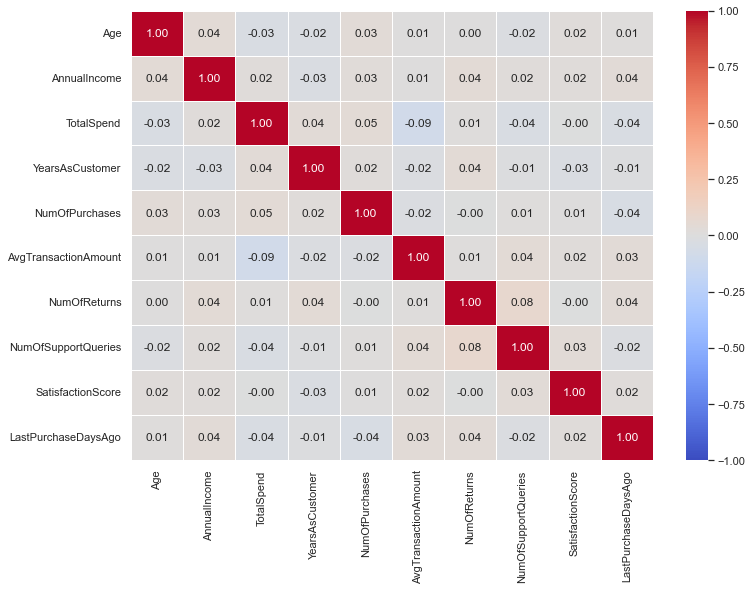

In [8]:
num_data = data.iloc[:,1:].select_dtypes(include = ["int64","float64"]) # customer id dropped as it is independent of churn
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(num_data.corr(),annot=True,cmap="coolwarm",linewidths=0.5,vmin=-1,vmax=1,fmt=".2f")

**Checking unique values for columns with non-numeric and non-boolean data and encoding them accordingly**

In [9]:
data['Gender'].unique() # checking all categories for gender

array(['Other', 'Male', 'Female'], dtype=object)

In [10]:
data["PromotionResponse"].unique() # checking all categories for Promotion Response

array(['Responded', 'Ignored', 'Unsubscribed'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
# encoding gender
le_gender.fit(data["Gender"].unique())

LabelEncoder()

In [12]:
le_gender.classes_

array(['Female', 'Male', 'Other'], dtype=object)

In [13]:
data['Gender'] = le_gender.transform(data['Gender'])

In [14]:
data.loc[data["PromotionResponse"]=="Responded","PromotionResponse"] = 1
data.loc[data["PromotionResponse"]=="Ignored","PromotionResponse"] = 0
data.loc[data["PromotionResponse"]=="Unsubscribed","PromotionResponse"] = -1
data = data.astype({"PromotionResponse":int})

In [15]:
data.dtypes

CustomerID                int64
Age                       int64
Gender                    int32
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                 bool
PromotionResponse         int32
Churn                      bool
dtype: object

### Viewing the data after encoding Gender and PromotionResponse

In [16]:
data.head(5)

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,True,1,True
1,2,65,1,79.51,9025.47,13,77,22.90,2,2,3,227,False,1,False
2,3,18,1,29.19,618.83,13,71,50.53,5,2,2,283,False,1,True
3,4,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,True,0,True
4,5,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,False,-1,False


In [17]:
data.dtypes

CustomerID                int64
Age                       int64
Gender                    int32
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                 bool
PromotionResponse         int32
Churn                      bool
dtype: object

<AxesSubplot:>

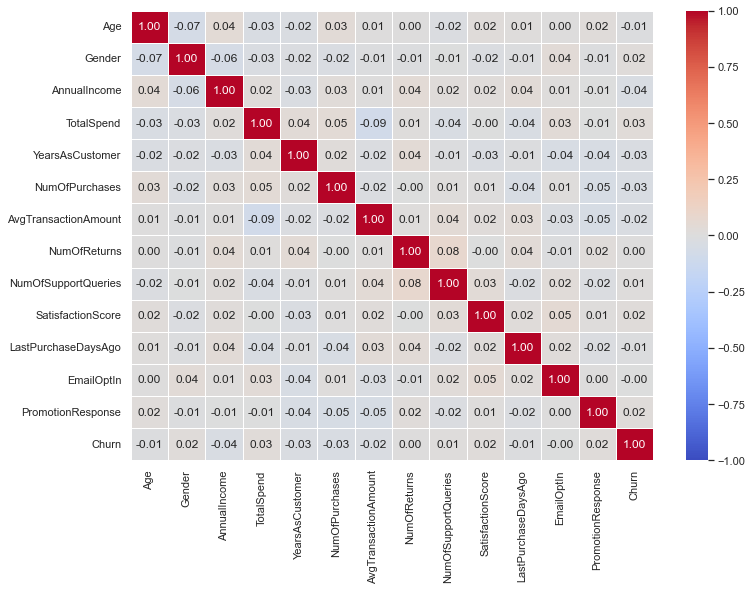

In [18]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.iloc[:,1:].corr(),vmax=1,vmin=-1,annot=True,fmt=".2f",linewidths=0.5,cmap='coolwarm')

In [19]:
data.describe() # describing the data

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,PromotionResponse
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,0.982000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000,-0.023000
std,288.819436,15.242311,0.816298,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319,0.836164
min,1.000000,18.000000,0.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000,-1.000000
25%,250.750000,30.000000,0.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000,-1.000000
50%,500.500000,43.000000,1.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000,0.000000
75%,750.250000,56.000000,2.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000,1.000000
max,1000.000000,69.000000,2.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000,1.000000


#### **Percentage of customers who churned in given data**

In [20]:
sum(data["Churn"]==True)*100/len(data["Churn"])

52.6

### **splitting into Test and Training Data**

In [21]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:14] # features where customer id is excluded as it is independent of Churn
y = data["Churn"] # label to be predicted
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42) # splits 20% for test and 80% for training

### **AdaBoost Classifier using Decision Trees as Base Model**

In [41]:
clf = AdaBoostClassifier() 
from sklearn.tree import DecisionTreeClassifier
parameters = dict()
parameters["estimator"] = [DecisionTreeClassifier(max_depth=2)]
parameters["algorithm"] = ["SAMME"]
parameters["n_estimators"] = [5,10,25,50,75,85,100,125,150,175,200]
parameters["learning_rate"] = [0.25,0.5,1,1.25,1.5,2]

#### Hyperparametric tuning

In [42]:
from sklearn.model_selection import GridSearchCV
adaclf = GridSearchCV(clf,param_grid = parameters,n_jobs=-1,cv=5,verbose=3,return_train_score=True,scoring="accuracy")

#### Fitting the data

In [43]:
adaclf.fit(X_train,y_train) # fitting the model

Fitting 5 folds for each of 66 candidates, totalling 330 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'estimator': [DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.25, 0.5, 1, 1.25, 1.5, 2],
                         'n_estimators': [5, 10, 25, 50, 75, 85, 100, 125, 150,
                                          175, 200]},
             return_train_score=True, scoring='accuracy', verbose=3)

Best Parameters found and best score on training data

In [44]:
adaclf.best_params_

{'algorithm': 'SAMME',
 'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 2,
 'n_estimators': 75}

In [45]:
adaclf.best_score_

0.525

### Evaluating performance

Accuracy score

In [46]:
adaclf.score(X_test,y_test)

0.615

Confusion Matrix

In [28]:
confusion_matrix(y_test,adaclf.predict(X_test))

array([[ 11,  83],
       [  4, 102]], dtype=int64)

F1 score, Precision and Recall

In [29]:
lab = ['Accuracy','F Score','Precision','Recall']
score = [adaclf.score(X_test,y_test),f1_score(y_test,adaclf.predict(X_test)),precision_score(y_test,adaclf.predict(X_test)),recall_score(y_test,adaclf.predict(X_test))]
adatest = pd.DataFrame((zip(lab,score)),columns=["Metric","score"])
adatest

,Metric,score
0,Accuracy,0.565000
1,F Score,0.701031
2,Precision,0.551351
3,Recall,0.962264


### **Random Forest Classifier**

In [30]:
rf = RandomForestClassifier()
parameters = dict()
parameters["n_estimators"] = [10,30,50,75,100,125,150,175,200]
parameters["criterion"] = ["gini","entropy"]
parameters["max_features"] = ["log2","sqrt",None]
parameters['max_depth'] = [3,5,7,9,11,13,15,17,19]
clrf = GridSearchCV(rf,param_grid=parameters,n_jobs=-1,verbose=3,return_train_score=True,cv=5,scoring="accuracy")

Fitting the data

In [31]:
clrf.fit(X_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['log2', 'sqrt', None],
                         'n_estimators': [10, 30, 50, 75, 100, 125, 150, 175,
                                          200]},
             return_train_score=True, scoring='accuracy', verbose=3)

Best Parameters found and best score on training data

In [32]:
clrf.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': None,
 'n_estimators': 150}

In [33]:
clrf.best_score_

0.5387500000000001

### Evaluating performance on test data

Accuracy score

In [34]:
clrf.score(X_test,y_test)

0.505

confusion matrix

In [35]:
confusion_matrix(y_test,clrf.predict(X_test))

array([[31, 63],
       [36, 70]], dtype=int64)

F score, Precision and Recall

In [36]:
lab = ['Accuracy','F Score','Precision','Recall']
score = [clrf.score(X_test,y_test),f1_score(y_test,clrf.predict(X_test)),precision_score(y_test,clrf.predict(X_test)),recall_score(y_test,clrf.predict(X_test))]
rftest = pd.DataFrame((zip(lab,score)),columns=["Metric","score"])
rftest

,Metric,score
0,Accuracy,0.505000
1,F Score,0.585774
2,Precision,0.526316
3,Recall,0.660377


### Comparing the results

Confusion matrix

$\left(\begin{array}{cc} 
TP & FP\\
FN & TN
\end{array}\right)$ where N = The customer churns and P = The Customer does not churn

Adaboost

In [37]:
confusion_matrix(y_test,adaclf.predict(X_test))

array([[ 11,  83],
       [  4, 102]], dtype=int64)

Random Forest

In [38]:
confusion_matrix(y_test,clrf.predict(X_test))

array([[31, 63],
       [36, 70]], dtype=int64)

##### Scores on the test data

AdaBoost

In [39]:
print("Classification Report for AdaBoost")
print(classification_report(y_test,adaclf.predict(X_test),target_names=("Not Churn","Churn"),digits=3))

Classification Report for AdaBoost
              precision    recall  f1-score   support

   Not Churn      0.733     0.117     0.202        94
       Churn      0.551     0.962     0.701       106

    accuracy                          0.565       200
   macro avg      0.642     0.540     0.451       200
weighted avg      0.637     0.565     0.466       200



Random Forest

In [40]:
print("Classification Report for Random Forest")
print(classification_report(y_test,clrf.predict(X_test),target_names=("Not Churn","Churn"),digits=3))

Classification Report for Random Forest
              precision    recall  f1-score   support

   Not Churn      0.463     0.330     0.385        94
       Churn      0.526     0.660     0.586       106

    accuracy                          0.505       200
   macro avg      0.495     0.495     0.485       200
weighted avg      0.496     0.505     0.491       200



### Conclusion
From the above comparisons of Confusion Matrices, Adaboost correctly identified more customer who were going to churn than Random Forest. However Adaboost had similar performance in correctly identifying people who were not going to churn in the test data. So if finding customer who will churn has higher priority than Adaboost will surely be a more prefered choice. If finding customer who will not churn is of higher priority both the models have very similar performance